**What are the noise sources, system equations?**

Noise is the short variations of the signal from the average line, caused by signal fluctuations. The sources of noise for the accelerometer and gyroscope include external vibrations and hardware limitations.

External vibrations cause an additive noise to the system, which makes it more difficult to detect landings and when one axis isn’t being stimulated for either acceleration or angular velocity. One cause of external vibrations is the loose attachment of the phone to the leg using duct tape. This allowed the phone to wiggle and slide along the runner’s leg while they ran up the stairs. In effect, the measurements made by the phone are never consistently 0 in any axis, for both the accelerometer and the gyroscope. 

Hardware limitations cause both noise and drift in the system. The noise they cause is shown in the data collected, where there is an upper limit imposed on accelerations around ±70 to ±75m/s². This causes the data to be skewed to be, on average, more positive or more negative if there are often accelerations greater or less than that limit. This noise causes a drift which is visible in both the velocity and position graphs.

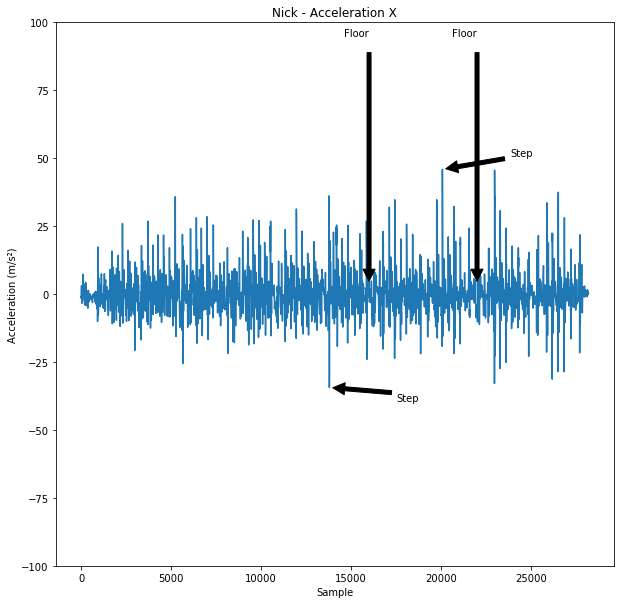

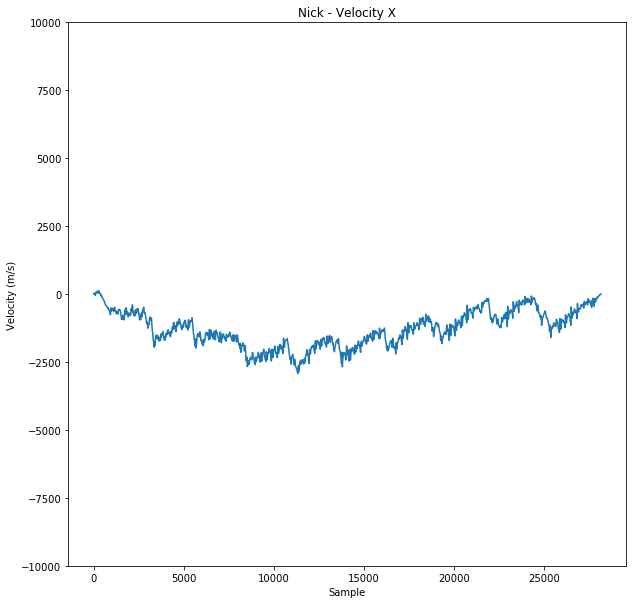

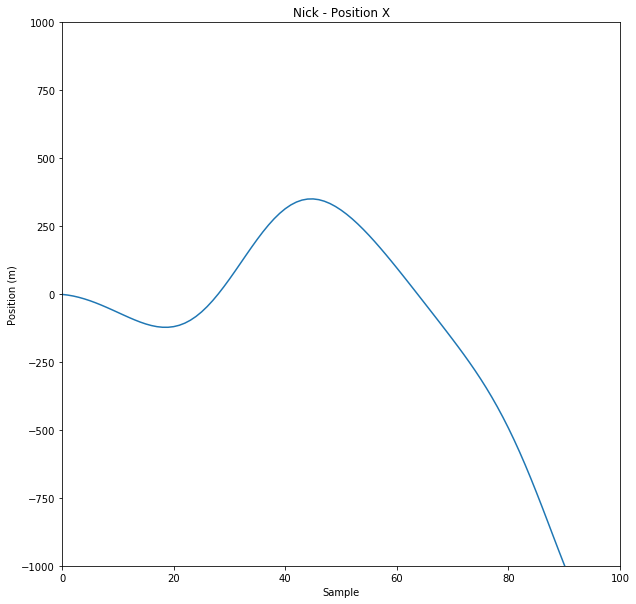

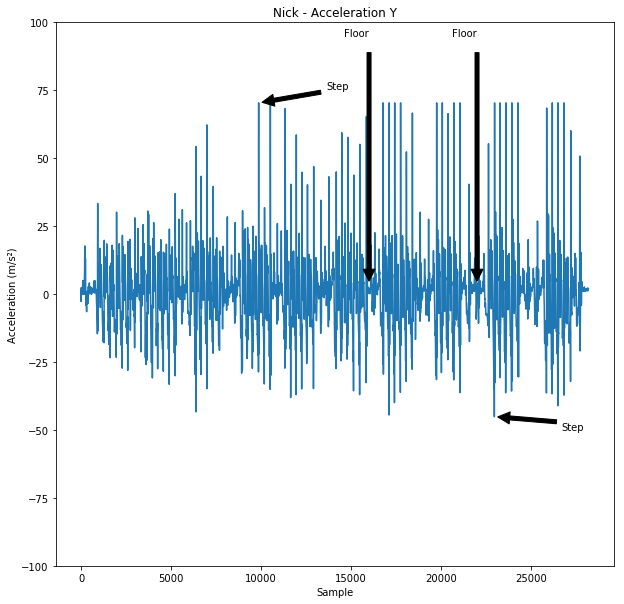

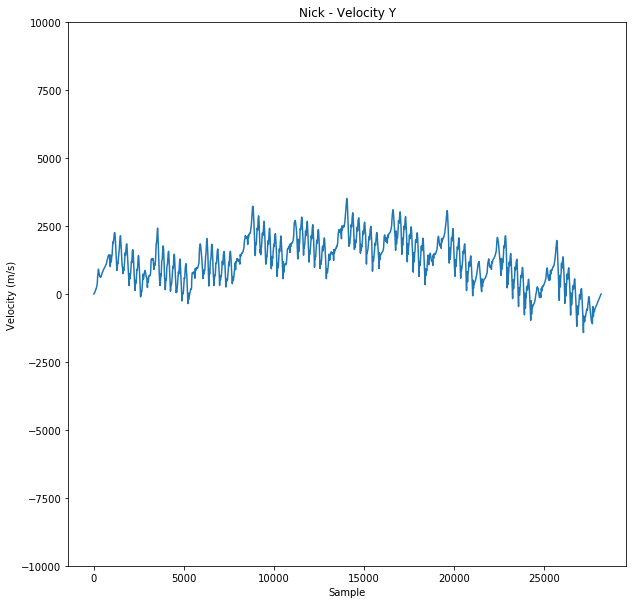

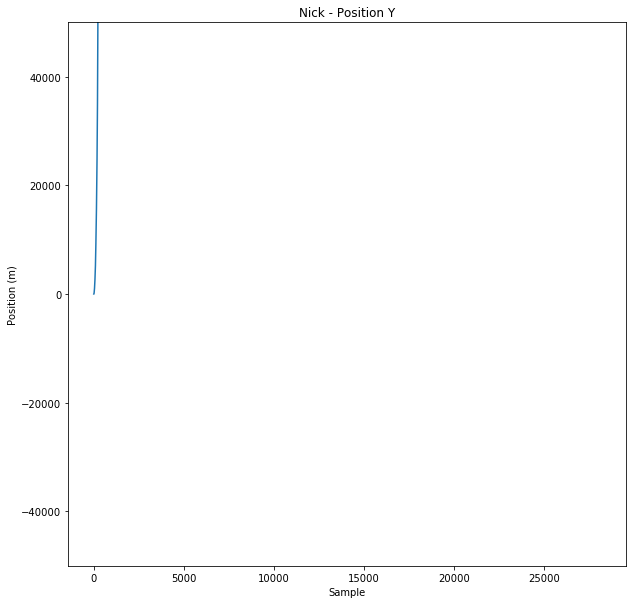

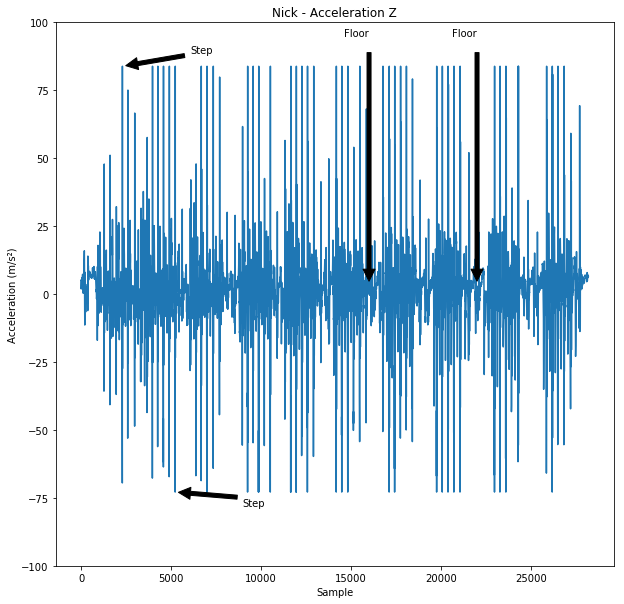

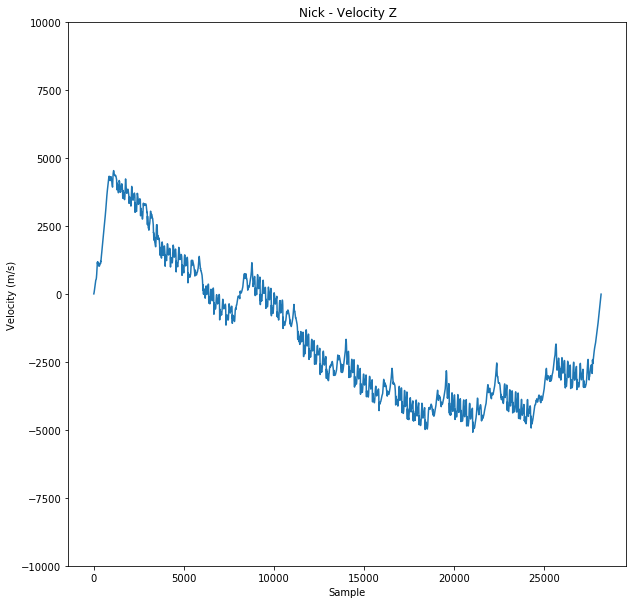

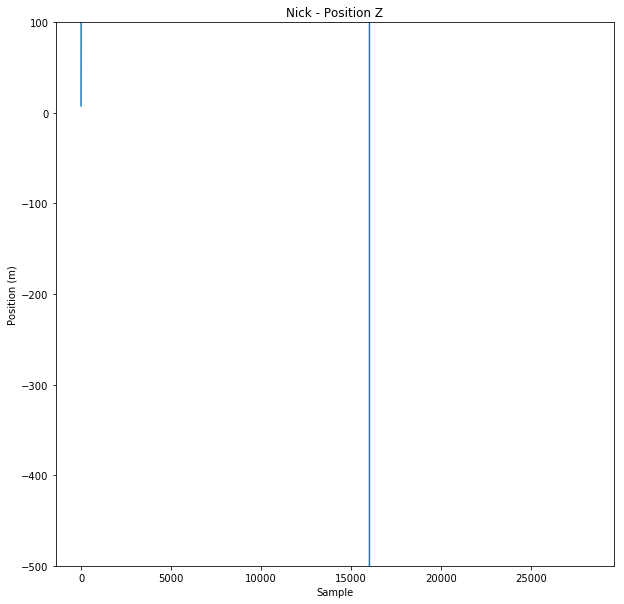

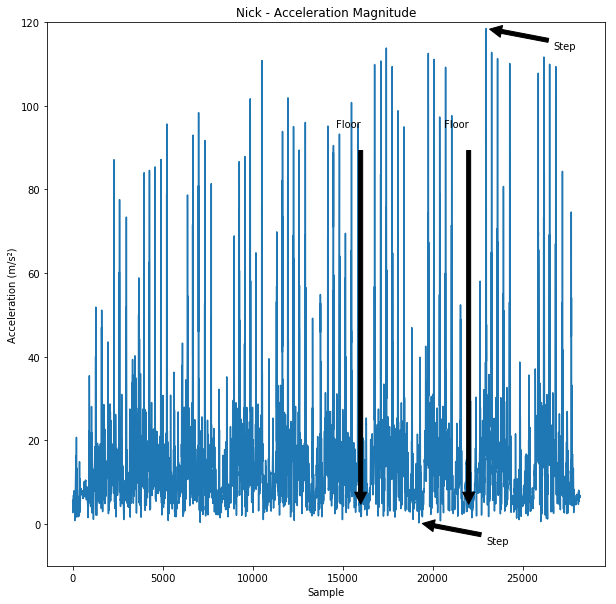

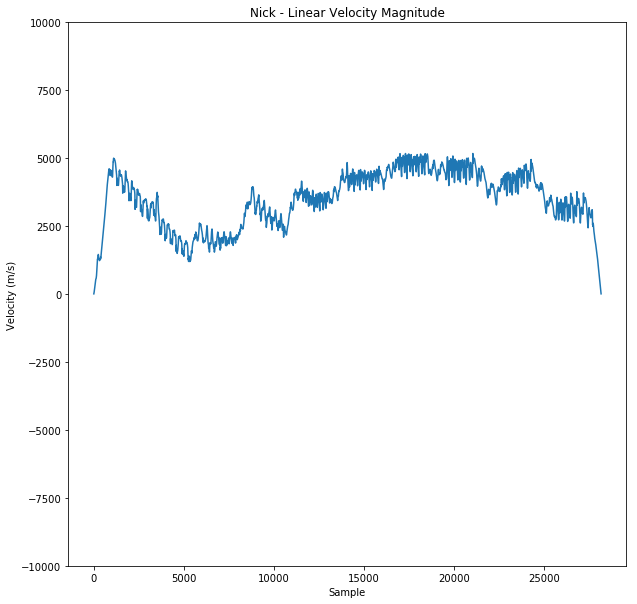

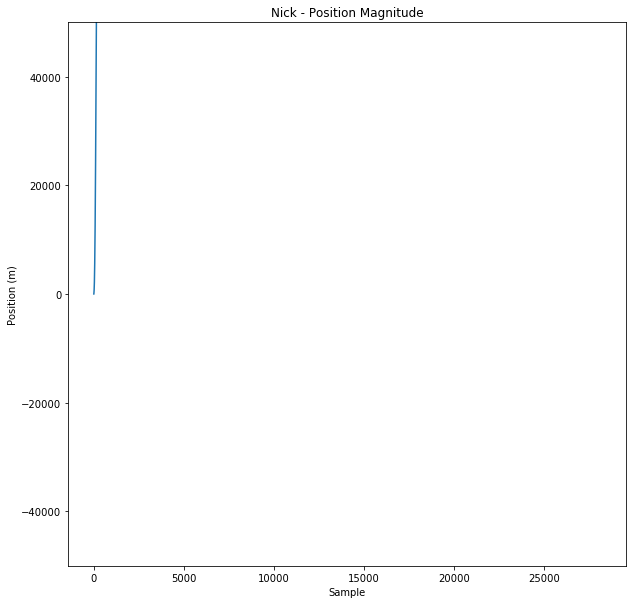

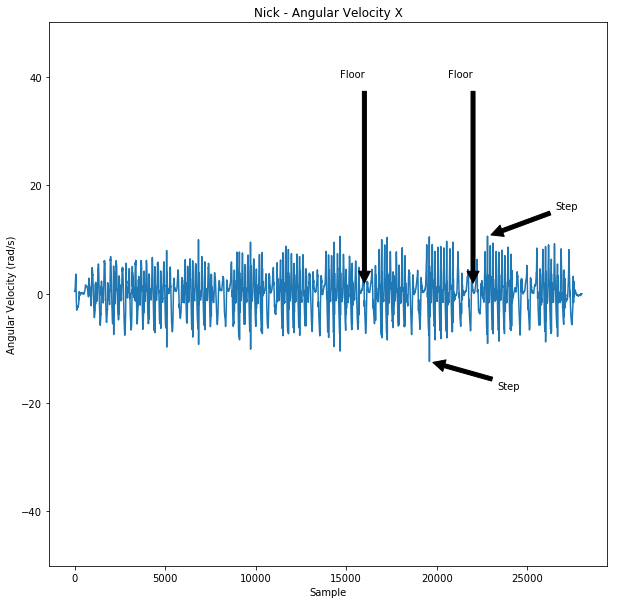

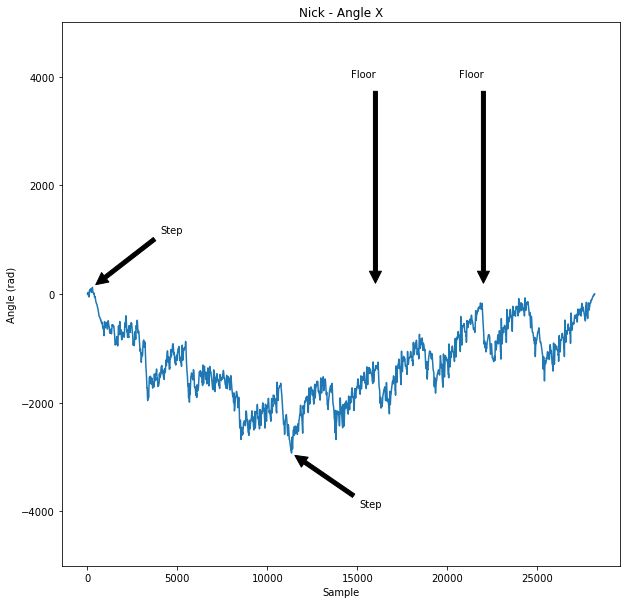

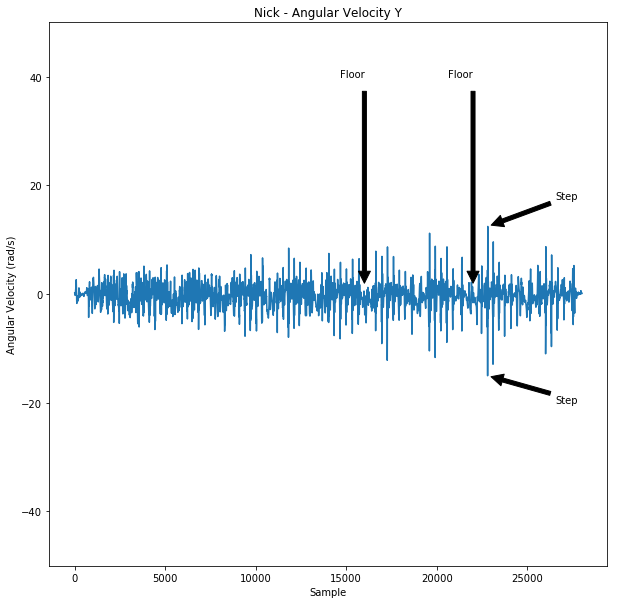

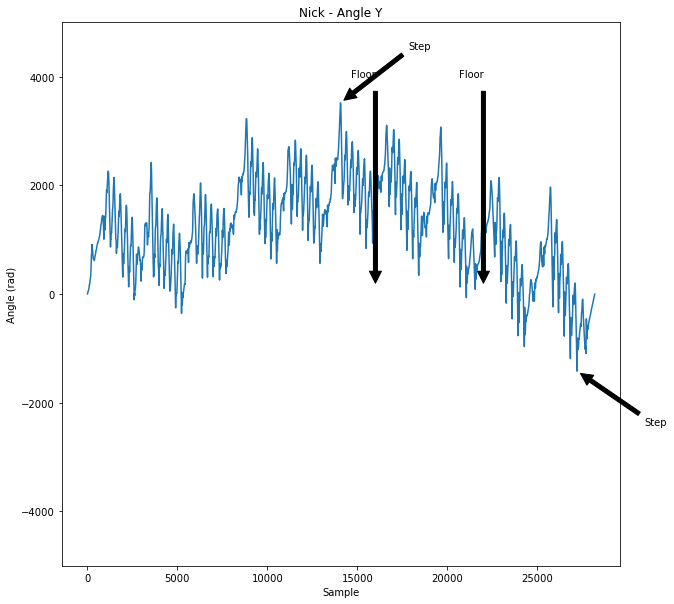

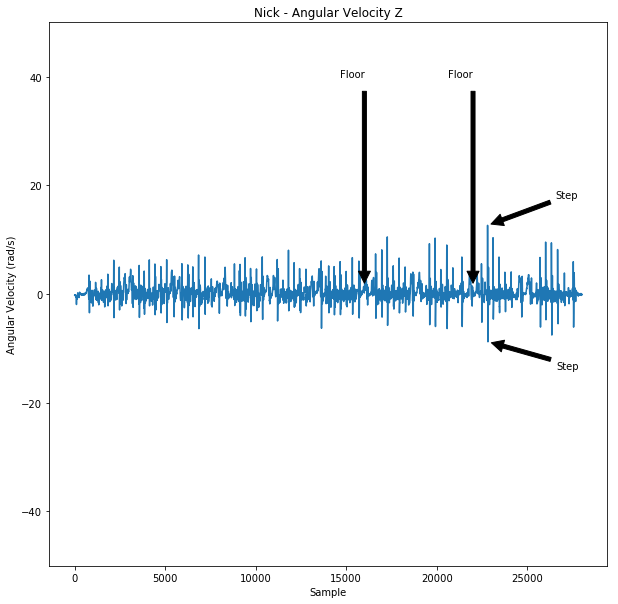

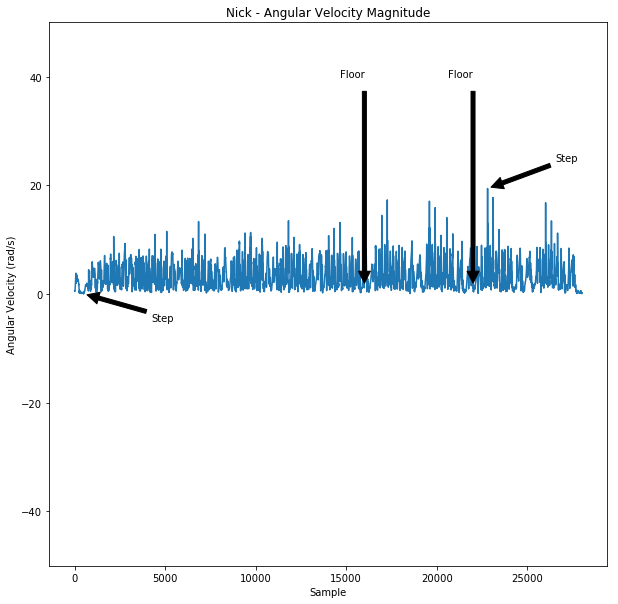

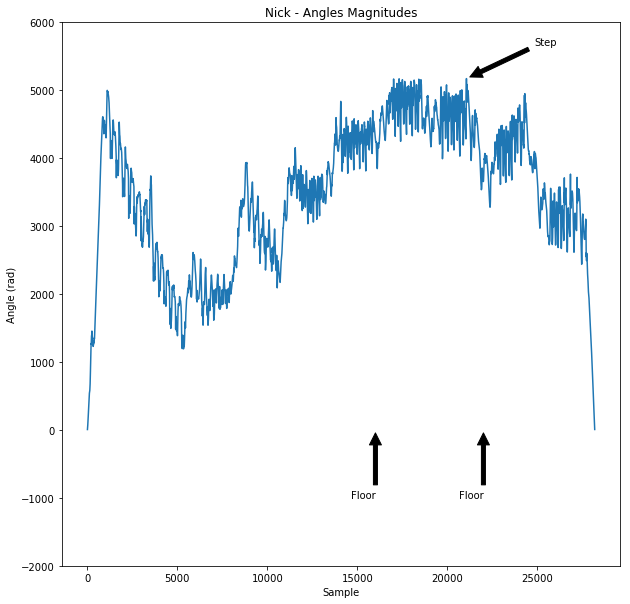

In [6]:
import csv
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import json
import math
import numpy as np
from scipy import integrate
from collections import defaultdict

#Maps data in the CSV file, eg [type ID, first column axis, second column axis, third column axis]
class CsvDataMap(object):
    acc = ['A', 'x', 'y', 'z']
    gyro = ['G', 'x', 'y', 'z']
    mag = [5, None, None, None]
    def __init__(self, acc, gyro, mag):
        self.acc = acc
        self.gyro = gyro
        self.mag = mag

#The .pdf file to save the plots into
pp = PdfPages('stairplots.pdf')
        
#Creates a map object based on experimentally determined type IDs and column axes
datamap = CsvDataMap(['A', 'x', 'y', 'z'], ['G', 'x', 'y', 'z'], [5, None, None, None])

#each matrix has 3 arrays contained, which each have 4 arrays.
#The outer 3 correspond to the axis: X,Y,Z -> 0,1,2
#The inner 4 correspond to the runner: Nick, Will, Christiaan, Lucas -> 0,1,2,3
acceleration = [[[],[],[],[]],[[],[],[],[]],[[],[],[],[]]]
gyroscope = [[[],[],[],[]],[[],[],[],[]],[[],[],[],[]]]
velocity = [[[],[],[],[]],[[],[],[],[]],[[],[],[],[]]]
position = [[[],[],[],[]],[[],[],[],[]],[[],[],[],[]]]
angles = [[[],[],[],[]],[[],[],[],[]],[[],[],[],[]]]
magnitudes = [[[],[],[],[]],[[],[],[],[]],[[],[],[],[]],[[],[],[],[]],[[],[],[],[]]]

#Open CSV data for each user, which contains rows of accelerometer and gyroscope data. Check for both on each row
with open('NickData.csv') as file:
    fileobj = csv.reader(file, skipinitialspace=True, delimiter=',')
    for row in fileobj:
        
        #check for acceleration
        try:
            accIndex = row.index(datamap.acc[0])
            accXCol = datamap.acc.index('x')
            accYCol = datamap.acc.index('y')
            accZCol = datamap.acc.index('z')
            #add the acceleration value in the csv's column that is 1, 2, and 3 indexes higher than the identifying column
            acceleration[0][0].append(float(row[accIndex + accXCol]))
            acceleration[1][0].append(float(row[accIndex + accYCol]))
            acceleration[2][0].append(float(row[accIndex + accZCol]))
        except ValueError:
            accIndex = None

        #check for gyro
        try:
            gyroIndex = row.index(datamap.gyro[0])
            gyroXCol = datamap.gyro.index('x')
            gyroYCol = datamap.gyro.index('y')
            gyroZCol = datamap.gyro.index('z')
            #same procedure as with acceleration, adding the column that contains the mapped axis
            gyroscope[0][0].append(float(row[gyroIndex + gyroXCol]))
            gyroscope[1][0].append(float(row[gyroIndex + gyroYCol]))
            gyroscope[2][0].append(float(row[gyroIndex + gyroZCol]))
        except ValueError:
            gyroIndex = None

with open('WillData.csv') as file:
    fileobj = csv.reader(file, skipinitialspace=True, delimiter=',')
    for row in fileobj:
        
        #check for acceleration
        try:
            accIndex = row.index(datamap.acc[0])
            accXCol = datamap.acc.index('x')
            accYCol = datamap.acc.index('y')
            accZCol = datamap.acc.index('z')
            acceleration[0][1].append(float(row[accIndex + accXCol]))
            acceleration[1][1].append(float(row[accIndex + accYCol]))
            acceleration[2][1].append(float(row[accIndex + accZCol]))
        except ValueError:
            accIndex = None

        #check for gyro
        try:
            gyroIndex = row.index(datamap.gyro[0])
            gyroXCol = datamap.gyro.index('x')
            gyroYCol = datamap.gyro.index('y')
            gyroZCol = datamap.gyro.index('z')
            gyroscope[0][1].append(float(row[gyroIndex + gyroXCol]))
            gyroscope[1][1].append(float(row[gyroIndex + gyroYCol]))
            gyroscope[2][1].append(float(row[gyroIndex + gyroZCol]))
        except ValueError:
            gyroIndex = None

with open('ChrisData.csv') as file:
    fileobj = csv.reader(file, skipinitialspace=True, delimiter=',')
    for row in fileobj:
        
        #check for acceleration
        try:
            accIndex = row.index(datamap.acc[0])
            accXCol = datamap.acc.index('x')
            accYCol = datamap.acc.index('y')
            accZCol = datamap.acc.index('z')
            acceleration[0][2].append(float(row[accIndex + accXCol]))
            acceleration[1][2].append(float(row[accIndex + accYCol]))
            acceleration[2][2].append(float(row[accIndex + accZCol]))
        except ValueError:
            accIndex = None

        #check for gyro
        try:
            gyroIndex = row.index(datamap.gyro[0])
            gyroXCol = datamap.gyro.index('x')
            gyroYCol = datamap.gyro.index('y')
            gyroZCol = datamap.gyro.index('z')
            gyroscope[0][2].append(float(row[gyroIndex + gyroXCol]))
            gyroscope[1][2].append(float(row[gyroIndex + gyroYCol]))
            gyroscope[2][2].append(float(row[gyroIndex + gyroZCol]))
        except ValueError:
            gyroIndex = None

with open('LukeData.csv') as file:
    fileobj = csv.reader(file, skipinitialspace=True, delimiter=',')
    for row in fileobj:
        
        #check for acceleration
        try:
            accIndex = row.index(datamap.acc[0])
            accXCol = datamap.acc.index('x')
            accYCol = datamap.acc.index('y')
            accZCol = datamap.acc.index('z')
            acceleration[0][3].append(float(row[accIndex + accXCol]))
            acceleration[1][3].append(float(row[accIndex + accYCol]))
            acceleration[2][3].append(float(row[accIndex + accZCol]))
        except ValueError:
            accIndex = None

        #check for gyro
        try:
            gyroIndex = row.index(datamap.gyro[0])
            gyroXCol = datamap.gyro.index('x')
            gyroYCol = datamap.gyro.index('y')
            gyroZCol = datamap.gyro.index('z')
            gyroscope[0][3].append(float(row[gyroIndex + gyroXCol]))
            gyroscope[1][3].append(float(row[gyroIndex + gyroYCol]))
            gyroscope[2][3].append(float(row[gyroIndex + gyroZCol]))
        except ValueError:
            gyroIndex = None

#normalizes by dividing each point by the average of every point
def normalize(a):
    avg = sum(a)/len(a)
    for x in range(0, len(a)):
        a[x] = a[x]-avg
    
    return a

#normalize acceleration to attempt to reduce drift, and fill velocity and position matrices
for axisKey,axis in enumerate(acceleration):
    for userKey,user in enumerate(axis):
        acceleration[axisKey][userKey] = normalize(acceleration[axisKey][userKey])
        velocity[axisKey][userKey] = integrate.cumtrapz(acceleration[axisKey][userKey])
        position[axisKey][userKey] = integrate.cumtrapz(velocity[axisKey][userKey])
        
#fill angles matrix
for axisKey,axis in enumerate(gyroscope):
    for userKey,user in enumerate(axis):
        angles[axisKey][userKey] = integrate.cumtrapz(acceleration[axisKey][userKey])

#calculate magnitudes for all graphs (= sqrt(x^2 + y^2 + z^2))
#calculate magnitudes of accelerations
for userKey,user in enumerate(magnitudes[0]):
    for x in range(0, len(acceleration[0][userKey])):
        magnitudes[0][userKey].append(math.sqrt(math.pow(acceleration[0][userKey][x], 2) + math.pow(acceleration[1][userKey][x], 2) + math.pow(acceleration[2][userKey][x], 2)))
        
#calculate magnitudes of linear velocities
for userKey,user in enumerate(magnitudes[1]):
    for x in range(0, len(velocity[0][userKey])):
        magnitudes[1][userKey].append(math.sqrt(math.pow(velocity[0][userKey][x], 2) + math.pow(velocity[1][userKey][x], 2) + math.pow(velocity[2][userKey][x], 2)))
        
#calculate magnitudes of positions
for userKey,user in enumerate(magnitudes[2]):
    for x in range(0, len(position[0][userKey])):
        magnitudes[2][userKey].append(math.sqrt(math.pow(position[0][userKey][x], 2) + math.pow(position[1][userKey][x], 2) + math.pow(position[2][userKey][x], 2)))
        
#calculate magnitudes of angular velocities
for userKey,user in enumerate(magnitudes[3]):
    for x in range(0, len(gyroscope[0][userKey])):
        magnitudes[3][userKey].append(math.sqrt(math.pow(gyroscope[0][userKey][x], 2) + math.pow(gyroscope[1][userKey][x], 2) + math.pow(gyroscope[2][userKey][x], 2)))

#calculate magnitudes of angles
for userKey,user in enumerate(magnitudes[4]):
    for x in range(0, len(angles[0][userKey])):
        magnitudes[4][userKey].append(math.sqrt(math.pow(angles[0][userKey][x], 2) + math.pow(angles[1][userKey][x], 2) + math.pow(angles[2][userKey][x], 2)))

#plots the data and saves the plots in a .pdf file
def plotAndSave():
    
    fig = plt.figure()
    plt.plot(acceleration[0][0])
    plt.ylim([-100,100])
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 10
    fig_size[1] = 10
    plt.rcParams["figure.figsize"] = fig_size
    plt.title("Nick - Acceleration X")
    plt.xlabel("Sample")
    plt.ylabel("Acceleration (m/s²)")
    plt.annotate('Floor', xy=(22000, 0), xytext=(22000, 95),arrowprops=dict(facecolor='black', shrink=0.05),horizontalalignment='right')
    plt.annotate('Floor', xy=(16000, 0), xytext=(16000, 95),arrowprops=dict(facecolor='black', shrink=0.05),horizontalalignment='right')
    plt.annotate('Step', xy=(np.argmin(acceleration[0][0]), np.min(acceleration[0][0])), xytext=(np.argmin(acceleration[0][0])+5000, np.min(acceleration[0][0])-5),arrowprops=dict(facecolor='black', shrink=0.05),horizontalalignment='right')
    plt.annotate('Step', xy=(np.argmax(acceleration[0][0]), np.max(acceleration[0][0])), xytext=(np.argmax(acceleration[0][0])+5000, np.max(acceleration[0][0])+5),arrowprops=dict(facecolor='black', shrink=0.05),horizontalalignment='right')
    pp.savefig(fig)
    
    fig = plt.figure()
    plt.plot(velocity[0][0])
    plt.ylim([-10000,10000])
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 10
    fig_size[1] = 10
    plt.rcParams["figure.figsize"] = fig_size
    plt.title("Nick - Velocity X")
    plt.xlabel("Sample")
    plt.ylabel("Velocity (m/s)")
    pp.savefig(fig)
    
    fig = plt.figure()
    plt.plot(position[0][0])
    plt.ylim([-1000,1000])
    plt.xlim([0,100])
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 10
    fig_size[1] = 10
    plt.rcParams["figure.figsize"] = fig_size
    plt.title("Nick - Position X")
    plt.xlabel("Sample")
    plt.ylabel("Position (m)")
    pp.savefig(fig)

    fig = plt.figure()
    plt.plot(acceleration[1][0])
    plt.ylim([-100,100])
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 10
    fig_size[1] = 10
    plt.rcParams["figure.figsize"] = fig_size
    plt.title("Nick - Acceleration Y")
    plt.xlabel("Sample")
    plt.ylabel("Acceleration (m/s²)")
    plt.annotate('Floor', xy=(22000, 0), xytext=(22000, 95),arrowprops=dict(facecolor='black', shrink=0.05),horizontalalignment='right')
    plt.annotate('Floor', xy=(16000, 0), xytext=(16000, 95),arrowprops=dict(facecolor='black', shrink=0.05),horizontalalignment='right')
    plt.annotate('Step', xy=(np.argmin(acceleration[1][0]), np.min(acceleration[1][0])), xytext=(np.argmin(acceleration[1][0])+5000, np.min(acceleration[1][0])-5),arrowprops=dict(facecolor='black', shrink=0.05),horizontalalignment='right')
    plt.annotate('Step', xy=(np.argmax(acceleration[1][0]), np.max(acceleration[1][0])), xytext=(np.argmax(acceleration[1][0])+5000, np.max(acceleration[1][0])+5),arrowprops=dict(facecolor='black', shrink=0.05),horizontalalignment='right')
    pp.savefig(fig)
    
    fig = plt.figure()
    plt.plot(velocity[1][0])
    plt.ylim([-10000,10000])
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 10
    fig_size[1] = 10
    plt.rcParams["figure.figsize"] = fig_size
    plt.title("Nick - Velocity Y")
    plt.xlabel("Sample")
    plt.ylabel("Velocity (m/s)")
    pp.savefig(fig)

    fig = plt.figure()
    plt.plot(position[1][0])
    plt.ylim([-50000,50000])
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 10
    fig_size[1] = 10
    plt.rcParams["figure.figsize"] = fig_size
    plt.title("Nick - Position Y")
    plt.xlabel("Sample")
    plt.ylabel("Position (m)")
    pp.savefig(fig)

    fig = plt.figure()
    plt.plot(acceleration[2][0])
    plt.ylim([-100,100])
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 10
    fig_size[1] = 10
    plt.rcParams["figure.figsize"] = fig_size
    plt.title("Nick - Acceleration Z")
    plt.xlabel("Sample")
    plt.ylabel("Acceleration (m/s²)")
    plt.annotate('Floor', xy=(22000, 0), xytext=(22000, 95),arrowprops=dict(facecolor='black', shrink=0.05),horizontalalignment='right')
    plt.annotate('Floor', xy=(16000, 0), xytext=(16000, 95),arrowprops=dict(facecolor='black', shrink=0.05),horizontalalignment='right')
    plt.annotate('Step', xy=(np.argmin(acceleration[2][0]), np.min(acceleration[2][0])), xytext=(np.argmin(acceleration[2][0])+5000, np.min(acceleration[2][0])-5),arrowprops=dict(facecolor='black', shrink=0.05),horizontalalignment='right')
    plt.annotate('Step', xy=(np.argmax(acceleration[2][0]), np.max(acceleration[2][0])), xytext=(np.argmax(acceleration[2][0])+5000, np.max(acceleration[2][0])+5),arrowprops=dict(facecolor='black', shrink=0.05),horizontalalignment='right')
    pp.savefig(fig)
    
    fig = plt.figure()
    plt.plot(velocity[2][0])
    plt.ylim([-10000,10000])
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 10
    fig_size[1] = 10
    plt.rcParams["figure.figsize"] = fig_size
    plt.title("Nick - Velocity Z")
    plt.xlabel("Sample")
    plt.ylabel("Velocity (m/s)")
    pp.savefig(fig)

    fig = plt.figure()
    plt.plot(position[2][0])
    plt.ylim([-500,100])
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 10
    fig_size[1] = 10
    plt.rcParams["figure.figsize"] = fig_size
    plt.title("Nick - Position Z")
    plt.xlabel("Sample")
    plt.ylabel("Position (m)")
    pp.savefig(fig)
    
    fig = plt.figure()
    plt.plot(magnitudes[0][0])
    plt.ylim([-10,120])
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 10
    fig_size[1] = 10
    plt.rcParams["figure.figsize"] = fig_size
    plt.title("Nick - Acceleration Magnitude")
    plt.xlabel("Sample")
    plt.ylabel("Acceleration (m/s²)")
    plt.annotate('Floor', xy=(22000, 0), xytext=(22000, 95),arrowprops=dict(facecolor='black', shrink=0.05),horizontalalignment='right')
    plt.annotate('Floor', xy=(16000, 0), xytext=(16000, 95),arrowprops=dict(facecolor='black', shrink=0.05),horizontalalignment='right')
    plt.annotate('Step', xy=(np.argmin(magnitudes[0][0]), np.min(magnitudes[0][0])), xytext=(np.argmin(magnitudes[0][0])+5000, np.min(magnitudes[0][0])-5),arrowprops=dict(facecolor='black', shrink=0.05),horizontalalignment='right')
    plt.annotate('Step', xy=(np.argmax(magnitudes[0][0]), np.max(magnitudes[0][0])), xytext=(np.argmax(magnitudes[0][0])+5000, np.max(magnitudes[0][0])-5),arrowprops=dict(facecolor='black', shrink=0.05),horizontalalignment='right')
    pp.savefig(fig)
    
    fig = plt.figure()
    plt.plot(magnitudes[1][0])
    plt.ylim([-10000,10000])
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 10
    fig_size[1] = 10
    plt.rcParams["figure.figsize"] = fig_size
    plt.title("Nick - Linear Velocity Magnitude")
    plt.xlabel("Sample")
    plt.ylabel("Velocity (m/s)")
    pp.savefig(fig)
    
    fig = plt.figure()
    plt.plot(magnitudes[2][0])
    plt.ylim([-50000,50000])
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 10
    fig_size[1] = 10
    plt.rcParams["figure.figsize"] = fig_size
    plt.title("Nick - Position Magnitude")
    plt.xlabel("Sample")
    plt.ylabel("Position (m)")
    pp.savefig(fig)

    fig = plt.figure()
    plt.plot(gyroscope[0][0])
    plt.ylim([-50,50])
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 10
    fig_size[1] = 10
    plt.rcParams["figure.figsize"] = fig_size
    plt.title("Nick - Angular Velocity X")
    plt.xlabel("Sample")
    plt.ylabel("Angular Velocity (rad/s)")
    plt.annotate('Floor', xy=(22000, 0), xytext=(22000, 40),arrowprops=dict(facecolor='black', shrink=0.05),horizontalalignment='right')
    plt.annotate('Floor', xy=(16000, 0), xytext=(16000, 40),arrowprops=dict(facecolor='black', shrink=0.05),horizontalalignment='right')
    plt.annotate('Step', xy=(np.argmin(gyroscope[0][0]), np.min(gyroscope[0][0])), xytext=(np.argmin(gyroscope[0][0])+5000, np.min(gyroscope[0][0])-5),arrowprops=dict(facecolor='black', shrink=0.05),horizontalalignment='right')
    plt.annotate('Step', xy=(np.argmax(gyroscope[0][0]), np.max(gyroscope[0][0])), xytext=(np.argmax(gyroscope[0][0])+5000, np.max(gyroscope[0][0])+5),arrowprops=dict(facecolor='black', shrink=0.05),horizontalalignment='right')
    pp.savefig(fig)
    
    fig = plt.figure()
    plt.plot(angles[0][0])
    plt.ylim([-5000,5000])
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 10
    fig_size[1] = 10
    plt.rcParams["figure.figsize"] = fig_size
    plt.title("Nick - Angle X")
    plt.xlabel("Sample")
    plt.ylabel("Angle (rad)")
    plt.annotate('Floor', xy=(22000, 0), xytext=(22000, 4000),arrowprops=dict(facecolor='black', shrink=0.05),horizontalalignment='right')
    plt.annotate('Floor', xy=(16000, 0), xytext=(16000, 4000),arrowprops=dict(facecolor='black', shrink=0.05),horizontalalignment='right')
    plt.annotate('Step', xy=(np.argmin(angles[0][0]), np.min(angles[0][0])), xytext=(np.argmin(angles[0][0])+5000, np.min(angles[0][0])-1000),arrowprops=dict(facecolor='black', shrink=0.05),horizontalalignment='right')
    plt.annotate('Step', xy=(np.argmax(angles[0][0]), np.max(angles[0][0])), xytext=(np.argmax(angles[0][0])+5000, np.max(angles[0][0])+1000),arrowprops=dict(facecolor='black', shrink=0.05),horizontalalignment='right')
    pp.savefig(fig)
    
    fig = plt.figure()
    plt.plot(gyroscope[1][0])
    plt.ylim([-50,50])
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 10
    fig_size[1] = 10
    plt.rcParams["figure.figsize"] = fig_size
    plt.title("Nick - Angular Velocity Y")
    plt.xlabel("Sample")
    plt.ylabel("Angular Velocity (rad/s)")
    plt.annotate('Floor', xy=(22000, 0), xytext=(22000, 40),arrowprops=dict(facecolor='black', shrink=0.05),horizontalalignment='right')
    plt.annotate('Floor', xy=(16000, 0), xytext=(16000, 40),arrowprops=dict(facecolor='black', shrink=0.05),horizontalalignment='right')
    plt.annotate('Step', xy=(np.argmin(gyroscope[1][0]), np.min(gyroscope[1][0])), xytext=(np.argmin(gyroscope[1][0])+5000, np.min(gyroscope[1][0])-5),arrowprops=dict(facecolor='black', shrink=0.05),horizontalalignment='right')
    plt.annotate('Step', xy=(np.argmax(gyroscope[1][0]), np.max(gyroscope[1][0])), xytext=(np.argmax(gyroscope[1][0])+5000, np.max(gyroscope[1][0])+5),arrowprops=dict(facecolor='black', shrink=0.05),horizontalalignment='right')
    pp.savefig(fig)
    
    fig = plt.figure()
    plt.plot(angles[1][0])
    plt.ylim([-5000,5000])
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 10
    fig_size[1] = 10
    plt.rcParams["figure.figsize"] = fig_size
    plt.title("Nick - Angle Y")
    plt.xlabel("Sample")
    plt.ylabel("Angle (rad)")
    plt.annotate('Floor', xy=(22000, 0), xytext=(22000, 4000),arrowprops=dict(facecolor='black', shrink=0.05),horizontalalignment='right')
    plt.annotate('Floor', xy=(16000, 0), xytext=(16000, 4000),arrowprops=dict(facecolor='black', shrink=0.05),horizontalalignment='right')
    plt.annotate('Step', xy=(np.argmin(angles[1][0]), np.min(angles[1][0])), xytext=(np.argmin(angles[1][0])+5000, np.min(angles[1][0])-1000),arrowprops=dict(facecolor='black', shrink=0.05),horizontalalignment='right')
    plt.annotate('Step', xy=(np.argmax(angles[1][0]), np.max(angles[1][0])), xytext=(np.argmax(angles[1][0])+5000, np.max(angles[1][0])+1000),arrowprops=dict(facecolor='black', shrink=0.05),horizontalalignment='right')
    pp.savefig(fig)
    
    fig = plt.figure()
    plt.plot(gyroscope[2][0])
    plt.ylim([-50,50])
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 10
    fig_size[1] = 10
    plt.rcParams["figure.figsize"] = fig_size
    plt.title("Nick - Angular Velocity Z")
    plt.xlabel("Sample")
    plt.ylabel("Angular Velocity (rad/s)")
    plt.annotate('Floor', xy=(22000, 0), xytext=(22000, 40),arrowprops=dict(facecolor='black', shrink=0.05),horizontalalignment='right')
    plt.annotate('Floor', xy=(16000, 0), xytext=(16000, 40),arrowprops=dict(facecolor='black', shrink=0.05),horizontalalignment='right')
    plt.annotate('Step', xy=(np.argmin(gyroscope[2][0]), np.min(gyroscope[2][0])), xytext=(np.argmin(gyroscope[2][0])+5000, np.min(gyroscope[2][0])-5),arrowprops=dict(facecolor='black', shrink=0.05),horizontalalignment='right')
    plt.annotate('Step', xy=(np.argmax(gyroscope[2][0]), np.max(gyroscope[2][0])), xytext=(np.argmax(gyroscope[2][0])+5000, np.max(gyroscope[2][0])+5),arrowprops=dict(facecolor='black', shrink=0.05),horizontalalignment='right')
    pp.savefig(fig)
    
    fig = plt.figure()
    plt.plot(angles[2][0])
    plt.ylim([-5000,5000])
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 10
    fig_size[1] = 10
    plt.rcParams["figure.figsize"] = fig_size
    plt.title("Nick - Angle Z")
    plt.xlabel("Sample")
    plt.ylabel("Angle (rad)")
    plt.annotate('Floor', xy=(22000, 0), xytext=(22000, 4000),arrowprops=dict(facecolor='black', shrink=0.05),horizontalalignment='right')
    plt.annotate('Floor', xy=(16000, 0), xytext=(16000, 4000),arrowprops=dict(facecolor='black', shrink=0.05),horizontalalignment='right')
    plt.annotate('Step', xy=(np.argmin(angles[2][0]), np.min(angles[2][0])), xytext=(np.argmin(angles[2][0])+5000, np.min(angles[2][0])-1000),arrowprops=dict(facecolor='black', shrink=0.05),horizontalalignment='right')
    plt.annotate('Step', xy=(np.argmax(angles[2][0]), np.max(angles[2][0])), xytext=(np.argmax(angles[2][0])+5000, np.max(angles[2][0])-1000),arrowprops=dict(facecolor='black', shrink=0.05),horizontalalignment='right')
    pp.savefig(fig)
    
    fig = plt.figure()
    plt.plot(magnitudes[3][0])
    plt.ylim([-50,50])
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 10
    fig_size[1] = 10
    plt.rcParams["figure.figsize"] = fig_size
    plt.title("Nick - Angular Velocity Magnitude")
    plt.xlabel("Sample")
    plt.ylabel("Angular Velocity (rad/s)")
    plt.annotate('Floor', xy=(22000, 0), xytext=(22000, 40),arrowprops=dict(facecolor='black', shrink=0.05),horizontalalignment='right')
    plt.annotate('Floor', xy=(16000, 0), xytext=(16000, 40),arrowprops=dict(facecolor='black', shrink=0.05),horizontalalignment='right')
    plt.annotate('Step', xy=(np.argmin(magnitudes[3][0]), np.min(magnitudes[3][0])), xytext=(np.argmin(magnitudes[3][0])+5000, np.min(magnitudes[3][0])-5),arrowprops=dict(facecolor='black', shrink=0.05),horizontalalignment='right')
    plt.annotate('Step', xy=(np.argmax(magnitudes[3][0]), np.max(magnitudes[3][0])), xytext=(np.argmax(magnitudes[3][0])+5000, np.max(magnitudes[3][0])+5),arrowprops=dict(facecolor='black', shrink=0.05),horizontalalignment='right')
    pp.savefig(fig)
    
    fig = plt.figure()
    plt.plot(magnitudes[4][0])
    plt.ylim([-2000,6000])
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 10
    fig_size[1] = 10
    plt.rcParams["figure.figsize"] = fig_size
    plt.title("Nick - Angles Magnitudes")
    plt.xlabel("Sample")
    plt.ylabel("Angle (rad)")
    plt.annotate('Floor', xy=(22000, 0), xytext=(22000, -1000),arrowprops=dict(facecolor='black', shrink=0.05),horizontalalignment='right')
    plt.annotate('Floor', xy=(16000, 0), xytext=(16000, -1000),arrowprops=dict(facecolor='black', shrink=0.05),horizontalalignment='right')
    #plt.annotate('Step', xy=(np.argmin(magnitudes[4][0]), np.min(magnitudes[4][0])), xytext=(np.argmin(magnitudes[4][0])+5000, np.min(magnitudes[4][0])-1000),arrowprops=dict(facecolor='black', shrink=0.05),horizontalalignment='right')
    plt.annotate('Step', xy=(np.argmax(magnitudes[4][0]), np.max(magnitudes[4][0])), xytext=(np.argmax(magnitudes[4][0])+5000, np.max(magnitudes[4][0])+500),arrowprops=dict(facecolor='black', shrink=0.05),horizontalalignment='right')
    pp.savefig(fig)
    
    pp.close()
    plt.show()
        
plotAndSave()